<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/Hira_LS_DS3_124_Make_features_LIVE_LESSON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

Supervised speech learning:
engineering features so that you can represent your data in a different way.

we will have a messy column with a employees data. Is there a fairness isssue when the employee is male or female and that has a connection with the % rate charge adn if the loan is going to be repaid.

- ability to extract info or enigneer new features.

- very useful for machine learning and analyzing data and visualizing it.



## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [1]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-03-28 22:16:47--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [              <=>   ]  21.29M   887KB/s    in 25s     

2019-03-28 22:17:12 (878 KB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22329081]



In [2]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: LoanStats_2018Q4.csv    


In [3]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [4]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","5083.61","5083.61","750.29","750.29","516.39","233.90","0.0","0.0","0.0","Feb-2019","190.21","Mar-2019","Feb-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","Cash","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","

In [5]:
import pandas as pd

df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2) #

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94%,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94%,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14%,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(128412, 145)

In [8]:
df.isnull().sum().sort_values()

total_cu_tl                                        0
mo_sin_old_rev_tl_op                               0
delinq_amnt                                        0
chargeoff_within_12_mths                           0
acc_open_past_24mths                               0
inq_last_12m                                       0
inq_fi                                             0
total_rev_hi_lim                                   0
max_bal_bc                                         0
open_rv_24m                                        0
open_rv_12m                                        0
total_bal_il                                       0
debt_settlement_flag                               0
open_il_12m                                        0
open_act_il                                        0
open_acc_6m                                        0
tot_cur_bal                                        0
tot_coll_amt                                       0
acc_now_delinq                                

In [9]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500 #done send it equal to none becasue then it would send all the data about rows to the colab
#and that is going to crash it because the Ram is only 12GB

df.head()

df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,0.0,0.0,0.0,Dec-2018,797.53,NaN,Nov-2018,0,NaN,1,Individual,NaN,NaN,NaN,0,0,259658,4,2,3,3,6.0,18149,86.0,4,6,12843,56.0,51500,2,2,5,11,21638.0,26321.0,44.1,0,0,12.0,397,4,4,6,5.0,22.0,4.0,22.0,0,4,5,7,14,3,9,19,5,12,0.0,0,0,7,96.4,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,9096.85,9096.85,1378.70,1378.70,903.15,475.55,0.0,0.0,0.0,Feb-2019,346.76,Mar-2019,Feb-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,155,77424,0,1,0,0,34.0,200,10.0,1,1,1866,42.0,15200,2,0,0,2,7039.0,4537.0,50.1,0,0,34.0,434,11,11,3,11.0,6.0,17.0,6.0,0,3,5,5,6,1,8,11,5,11,0.0,0,0,1,73.3,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,4538.94,4538.94,675.55,675.55,461.06,214.49,0.0,0.0,0.0,Feb-2019,169.83,Mar-2019,Feb-201

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [10]:
df.describe(exclude ='number') #pandas doesn't do automatic conversion



,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,128412,128412,128412,128412,107465,116708,128412,128412,128412,128412,128412,128412,128412,128412,128412,128412,128256,128412,128250,124941,128411,128412,14848,16782,128412,1,1,1,1,1,1,1,128412,128412,2,2,2
unique,2,46,7,35,43892,11,4,3,3,6,2,12,12,880,50,644,1074,2,5,3,7,2,3,573,2,1,1,1,1,1,1,1,2,2,1,1,1
top,36 months,13.56%,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Aug-2006,0%,w,Feb-2019,Mar-2019,Feb-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),Cash,N,Feb-2019,ACTIVE,Feb-2019
freq,88179,6976,38011,9770,2090,38826,63490,58350,46305,123768,128411,70603,70603,1370,17879,1130,1132,114498,123797,124903,125061,111630,6360,155,128411,1,1,1,1,1,1,1,102516,128410,2,2,2


### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

**

In [11]:
'13.56%'.strip('%') #you can strip signs and $ signs as well to convert things to numbers



'13.56'

In [12]:
type('13.56%'.strip('%'))

str

and now we can convert it into a float


In [13]:
type(float(13.56))

float

HOw to do it with pandas inside a  series??

In [0]:
df['int_rate'] = df['int_rate'].str.strip('%').astype(float).head() #this we setting the column
#equal to this command changes the column in the dataframe as well and if we run
 #df['int_rate'].head(), it would show that it is a float

But it is still an object, so we use astype(float)

In [15]:
(df['int_rate'].head() /100).head() #this is if we want this to run from 0 to 1 instead of 0 to 100

0    0.1356
1    0.1894
2    0.1797
3    0.1894
4    0.1614
Name: int_rate, dtype: float64

Define a function to remove percent signs from string and convert to floats

In [16]:
string = '13.56%' #reload data so that interest rate is again in % from

def remove_percent(string):
  return float(string.strip('%'))

remove_percent(string)

13.56

Apply the function to the `int_rate` column

In [17]:
df['int_rate'] = df['int_rate'].apply(remove_percent).head(20)

AttributeError: ignored

### Clean `emp_title`

Look at top 20 titles

In [0]:
df['emp_title'].value_counts().head(20) #counts all the teachers, managers, registered nurses etc.


In [0]:
df['emp_title'].isnull().sum()

How often is `emp_title` null?

Clean the title and handle missing values

In [0]:
import numpy as np

examples = ['owner', 'Supervisor',
           ' Project Manager', np.nan]
  #if we already ran it, the next cell would give an error because we already converted it to float??

In [0]:
def clean_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Unknown'
  
[clean_title(x) for x in examples]

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [0]:
df['emp_title'].apply(clean_title).head(10) #number 9 has been replaced with Unknown so that there
#is no NaN now

In [0]:
df['emp_title'].value_counts().head(20)

In [0]:
df.groupby('emp_title_manager')('int_rate').mean()

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [0]:
df.isnull().sum().sort_values(ascending=False) / len(df)

In [0]:
df['issue_d'].head()

In [0]:
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [0]:
df['issue_d'].head(10).values

In [0]:
df['issue_month'] = df['issue_d'].dt.month

In [0]:
df['issue_month'].head

In [0]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],
                                       infer_datetime_format=True)

In [0]:
df['earliest_cr_line'].head().values

In [0]:
df['days_from_earliest_credit_to_issue'] = (df['issue_d'] - df['earliest_cr_line']).dt.days

In [0]:
df['days_from_earliest_credit_to_issue'].describe()

In [0]:
25171/365

In [0]:
1126/365

In [0]:
5859/365

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

In [0]:
import pandas as pd

df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2) #

In [0]:
!tail LoanStats_2018Q4.csv 

In [33]:
df['int_rate'] = df['int_rate'].str.strip('%').astype(float).head()

AttributeError: ignored

In [0]:
df['term'] = df['term'].str.strip(' months').astype(float)

df['term']

In [0]:
df['loan_status'].value_counts()

**Convert the term column in to float**

- 

In [0]:
df['loan_status'].tolist()

In [0]:
df['loan_status_is_great'] = df['loan_status'].map({'Current':1, 'Fully Paid':1, 'Late (31-120 days)':0, 'In Grade Period':0, 'Late (16-30 days)':0, 'Charged Off':0})



In [0]:
df['loan_status_is_great'].head(0)

So I cheated a little bit where I used value_counts() to get the names of the other variables in the column but what do we do if we can only use else...?

**last_paymen_d_month** 
- make two columns : 'last_payment_d_month
- make 'column: 'last_payment_d_year'

In [0]:
df.head()

In [0]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])

In [0]:
df['last_payment_d_month'] = df['last_pymnt_d'].dt.month

In [0]:
df['last_payment_d_month']

In [0]:
df.shape

In [0]:
df['last_payment_d_year'] = df['last_pymnt_d'].dt.year



In [0]:
df['last_payment_d_year']

In [0]:
df.shape

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

**First the LendingClub Option**

In [0]:
df.head(10)

In [0]:
df['revol_util'].head(10)

In [0]:
df['revol_util'].isnull().sum()

In [0]:
df['revol_util'] = df['revol_util'].str.strip('%').astype(float).head()

In [0]:
df['revol_util'].describe()

In [0]:
df['revol_util'].fillna(19.10)

In [0]:
df['revol_util'].describe()

In [0]:
df['revol_util'].shape

In [0]:
df['revol_util'].isnull().sum()

SOOOO, the column has just 5 values..? Should I really replace with the mean?? Maybe I should replace with median

In [0]:
df['revol_util'].head()

In [0]:
df['emp_title'].value_counts()

Teacher                                     2090
Manager                                     1773
Registered Nurse                             952
Driver                                       924
RN                                           726
Supervisor                                   697
Sales                                        580
Project Manager                              526
General Manager                              523
Office Manager                               521
Owner                                        420
Director                                     402
Operations Manager                           387
Truck Driver                                 387
Nurse                                        326
Engineer                                     325
Sales Manager                                304
manager                                      301
Supervisor                                   270
Administrative Assistant                     269

Top 20 or replace with Other

In [0]:
import numpy as np

examples = ['owner', 'Supervisor',
           ' Project Manager', np.nan]

In [0]:
def clean_title(x):
  if isinstance(x, str):
    return x.strip().title()
  else:
    return 'Unknown'
  
[clean_title(x) for x in examples]

In [0]:
df['emp_title'].value_counts().head(20)

Ask during Standup

In [0]:
Title = ['Teacher', 'Manager', 'Registered Nurse',
           'Driver', 'RN', 'Supervisor', 'Sales', 'Project Managers',
           'General Manager', 'Office Manager', 'Owner', 'Director',
           'Operations Manager', 'Truck Driver', 'Nurse', 'Engineer',
           'Sales Manager', 'manager', 'Supervisor', 'Administrative Assistant']


In [0]:
df['some'] = df.loc[~df["emp_title"].isin(Title), "emp_title"] = "Other"

In [25]:
df['some'].value_counts().head()

Other    128412
Name: some, dtype: int64

In [30]:
df['emp_title'].head(50)

0       Other
1       Other
2       Other
3       Other
4       Other
5       Other
6       Other
7       Other
8       Other
9       Other
10      Other
11      Other
12      Other
13      Other
14      Other
15      Other
16      Other
17      Other
18      Other
19      Other
20      Other
21      Other
22      Other
23      Other
24      Other
25      Other
26      Other
27      Other
28    Manager
29      Other
30      Other
31      Other
32      Other
33      Other
34      Other
35      Other
36      Other
37      Other
38      Other
39      Other
40      Other
41      Other
42      Other
43      Other
44      Other
45      Other
46      Other
47      Other
48      Other
49      Other
Name: emp_title, dtype: object

In [0]:
df.loc[~df["emp_title"].isin(Title)] = "Other"

In [0]:
df['top_20'].value_counts().head(22)

In [0]:
df.replace(!=replace)

In [0]:
df['emp_title'].value_counts().head(20)

In [0]:
import numpy as np

examples = ['Teacher', 'Manager', 'Registered Nurse',
           'Driver', 'RN', 'Supervisor', 'Sales', 'Project Managers',
           'General Manager', 'Office Manager', 'Owner', 'Director',
           'Operations Manager', 'Truck Driver', 'Nurse', 'Engineer',
           'Sales Manager', 'manager', 'Supervisor', 'Administrative Assistant']

def top_twenty(x):
  if isinstance(x, str):
    return 'Other'
  else:
    return x.strip().title
  
[top_twenty(x) for x in examples]
    
    
    
  
    
    

In [0]:
df['emp_title'].value_counts().head(22)

In [0]:
condition = df['emp_title'].value_counts() >= 269

df[condition]

In [0]:
condition = df['title'].str.len() > 80
df[condition]

I want to draw a plot to show to see if there was a higher interest rate offered to high level positions liek managers compared to low-level positions.


TypeError: ignored

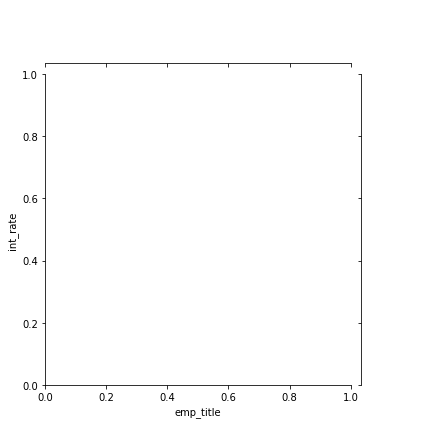

In [32]:
import seaborn as sns

g = sns.jointplot("emp_title", "int_rate", data=df, kind="hex")



In [0]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
%cd instacart_2017_05_01

In [0]:
df['term'].value_counts(dropna=False)

In [0]:
df['loan_status'].value_counts(dropna=False)

In [0]:
then use the last paymentd month and last payment d year 